In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
nifty_50_data=pd.read_csv("nifty_50_data.csv")

In [3]:
nifty_50_data.shape

(1337, 7)

In [4]:
nifty_50_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')

In [5]:
nifty_50_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Jan-16,7938.45,7972.55,7909.80,7963.20,64843836,2613.91
1,04-Jan-16,7924.55,7937.55,7781.10,7791.30,138864905,5897.08
2,05-Jan-16,7828.40,7831.20,7763.25,7784.65,149672973,5948.51
3,06-Jan-16,7788.05,7800.95,7721.20,7741.00,151715828,6722.17
4,07-Jan-16,7673.35,7674.95,7556.60,7568.30,194732861,7803.21


In [6]:
nifty_50_data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
1332,24-May-21,15211.35,15256.25,15145.45,15197.70,566722866,32061.04
1333,25-May-21,15291.75,15293.85,15163.40,15208.45,417323446,26871.99
1334,26-May-21,15257.05,15319.90,15194.95,15301.45,377682051,26187.83
1335,27-May-21,15323.95,15384.55,15272.50,15337.85,682374351,48219.93
1336,28-May-21,15421.20,15469.65,15394.75,15435.65,455582440,32992.08


In [7]:
nifty_50_data.drop('Date',axis =1,inplace= True)

In [8]:
nifty_50_data.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,1337.000000,1337.000000,1337.000000,1337.000000,1.337000e+03,1337.000000
mean,10551.217801,10601.792147,10478.865146,10541.079955,3.821585e+08,18102.545879
std,1837.120976,1843.148873,1822.883069,1834.139134,2.305726e+08,10659.000293
min,7023.650000,7034.200000,6825.800000,6970.600000,1.661087e+07,805.890000
25%,9142.600000,9183.150000,9088.750000,9136.850000,1.995594e+08,9698.550000
50%,10614.700000,10648.700000,10557.700000,10601.150000,2.988763e+08,14762.070000
75%,11564.850000,11599.100000,11490.750000,11552.500000,5.342895e+08,24204.550000
max,15421.200000,15469.650000,15394.750000,15435.650000,1.811564e+09,78522.930000


In [9]:
#check for missing values
nifty_50_data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [10]:
#check for categorical variables
nifty_50_data.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Shares Traded          int64
Turnover (Rs. Cr)    float64
dtype: object

In [11]:
#checking the correlation
nifty_50_data.corr()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.999333,0.999202,0.998601,0.480012,0.645532
High,0.999333,1.000000,0.998716,0.999330,0.491313,0.655983
Low,0.999202,0.998716,1.000000,0.999235,0.465930,0.634085
Close,0.998601,0.999330,0.999235,1.000000,0.478689,0.645668
Shares Traded,0.480012,0.491313,0.465930,0.478689,1.000000,0.862288
Turnover (Rs. Cr),0.645532,0.655983,0.634085,0.645668,0.862288,1.000000


In [12]:
#split X and y
X = nifty_50_data.iloc[:,:-1].values
y = nifty_50_data.iloc[:,-1].values

In [13]:
X.shape


(1337, 5)

In [14]:
y.shape


(1337,)

In [15]:
y = y.reshape(-1,1)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [18]:
#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

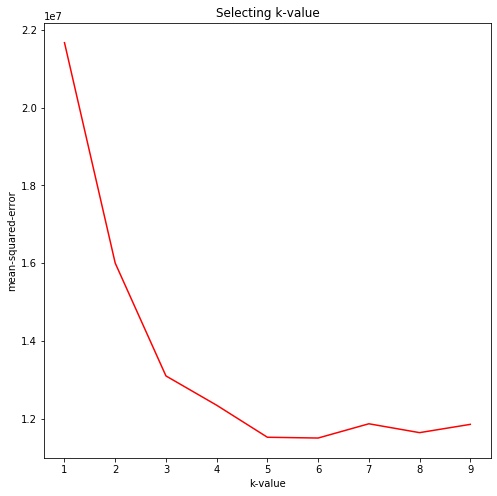

In [20]:
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

We can see from the model that we have lowest mse for the k value 5 

In [21]:
#Modell bulding
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
#Model Evaluation
r2_score(y_test,y_pred)


0.8866893160241645